# Introduction

In the given scenario, the objective is to develop a linear regression model to predict the number of times an online news article will be shared. The dataset, sourced from the UC Irvine machine learning archive, consists of 39,797 observations with 61 attributes. The **'shares'** variable serves as the **response variable** for the regression model.

#### The steps planned to address the problem include:

1. Data Loading
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis
4. Feature Engineering
5. Dimensionality Reduction using PCA
6. Model training and Performance evaluation

## 1. Data Loading

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

In [2]:
# Load the data
url = "https://raw.githubusercontent.com/Ansuman21/Data-Science-M4/main/M4_Data.csv"
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


#### Inference

* The dataset has been successfully loaded from the provided URL, and the initial exploration displays the first few rows, allowing for a quick overview of the structure and content.

## 2. Data Cleaning and Preprocessing

In [3]:
# Check for missing values
print("Missing Values:")
print(data.isnull().sum())

Missing Values:
url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64


#### Inference

* There are no missing values in the dataset as indicated by the absence of non-null counts in each column, suggesting a complete and intact dataset.

In [4]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100

# Filter columns with missing values
columns_with_missing_values = missing_percentage[missing_percentage > 0]

# Display the percentage of missing values for all columns
print("Missing Percentage for Columns:")
print(columns_with_missing_values)

Missing Percentage for Columns:
Series([], dtype: float64)


#### Inference
* There are no missing values in any column of the dataset, as indicated by the absence of non-null percentages for each column, reflecting a complete dataset.

In [5]:
# Split the numerical & categorical variable
numerical_features = data.select_dtypes(include=[np.number]).columns
categorical_features = data.select_dtypes(include=[object]).columns

# Print the split
print("Numerical Features:")
print(numerical_features)

print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
Index([' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       

#### Inference
* The dataset consists mainly of numerical features, with only the 'url' column being categorical, indicating that most variables are quantitative in nature and need to be handled for analysis and modeling.

In [6]:
# Winsorizing outliers in 'shares' at 99th percentile
winsorized_shares = np.where(data[' shares'] > data[' shares'].quantile(0.99), data[' shares'].quantile(0.99), data[' shares'])
data[' shares'] = winsorized_shares

#### Inference
* The above step applies Winsorization to the 'shares' variable by capping extreme values at the 99th percentile. This mitigates the impact of outliers, ensuring a more robust and representative dataset for modeling.

In [7]:
# Standardize numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Print the updated dataframe
print(data)

                                                     url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...    1.757880   
1      http://mashable.com/2013/01/07/ap-samsung-spon...    1.757880   
2      http://mashable.com/2013/01/07/apple-40-billio...    1.757880   
3      http://mashable.com/2013/01/07/astronaut-notre...    1.757880   
4       http://mashable.com/2013/01/07/att-u-verse-apps/    1.757880   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...   -1.618083   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...   -1.618083   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...   -1.618083   
39642     http://mashable.com/2014/12/27/ukraine-blasts/   -1.618083   
39643  http://mashable.com/2014/12/27/youtube-channel...   -1.618083   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0             0.757447          -0.695210          0.032772   
1        

#### Inference
* The numerical features have been standardized using StandardScaler, transforming them to a common scale for improved model performance and interpretation.

In [8]:
# Extracting 'url' column containing URLs into two separate columns i.e. published_date & title
data['published_date'] = data['url'].str.extract(r'(\d{4}/\d{2}/\d{2})')
data['title'] = data['url'].str.extract(r'/([^/]+)$')

# Display the updated dataframe
print(data)

                                                     url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...    1.757880   
1      http://mashable.com/2013/01/07/ap-samsung-spon...    1.757880   
2      http://mashable.com/2013/01/07/apple-40-billio...    1.757880   
3      http://mashable.com/2013/01/07/astronaut-notre...    1.757880   
4       http://mashable.com/2013/01/07/att-u-verse-apps/    1.757880   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...   -1.618083   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...   -1.618083   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...   -1.618083   
39642     http://mashable.com/2014/12/27/ukraine-blasts/   -1.618083   
39643  http://mashable.com/2014/12/27/youtube-channel...   -1.618083   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0             0.757447          -0.695210          0.032772   
1        

#### Inference
* The 'url' column was split into 'published_date' and 'title' using regular expressions. This allowed extraction of date information and the article title, providing a more granular view of the dataset.

In [9]:
# Drop 'title' column
data.drop(columns=['title'], inplace=True)

# Extract URLs into 'titles' column
data['titles'] = data['url'].str.extract(r'https?://([^\s]+)')

# Display the updated dataframe
print(data)

                                                     url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...    1.757880   
1      http://mashable.com/2013/01/07/ap-samsung-spon...    1.757880   
2      http://mashable.com/2013/01/07/apple-40-billio...    1.757880   
3      http://mashable.com/2013/01/07/astronaut-notre...    1.757880   
4       http://mashable.com/2013/01/07/att-u-verse-apps/    1.757880   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...   -1.618083   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...   -1.618083   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...   -1.618083   
39642     http://mashable.com/2014/12/27/ukraine-blasts/   -1.618083   
39643  http://mashable.com/2014/12/27/youtube-channel...   -1.618083   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0             0.757447          -0.695210          0.032772   
1        

#### Inference
* The 'title' column was dropped to streamline the dataset. URLs were then extracted and stored in a new 'titles' column, enhancing the information available for analysis while maintaining data relevance.

In [10]:
# Split the data into features (X) and target variable (y)
X = data.drop(columns=[' shares'])
y = data[' shares']

# Print X and y
print("Features (X):")
print(X.head())

print("\nTarget variable (y):")
print(y.head())

Features (X):
                                                 url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...     1.75788   
1  http://mashable.com/2013/01/07/ap-samsung-spon...     1.75788   
2  http://mashable.com/2013/01/07/apple-40-billio...     1.75788   
3  http://mashable.com/2013/01/07/astronaut-notre...     1.75788   
4   http://mashable.com/2013/01/07/att-u-verse-apps/     1.75788   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0         0.757447          -0.695210          0.032772           0.000675   
1        -0.661657          -0.618794          0.016056           0.000675   
2        -0.661657          -0.712192          0.007645           0.000675   
3        -0.661657          -0.032933         -0.012619           0.000675   
4         1.230482           1.115439         -0.037655           0.000675   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.038658   

#### Inference
* The dataset has been split into features (X) and the target variable (y). The features include all columns except the 'shares' column, while the target variable is the 'shares' column.

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (31715, 62)
X_test shape: (7929, 62)
y_train shape: (31715,)
y_test shape: (7929,)


#### Inference
* The dataset has been successfully split into training and testing sets, with 80% used for training and 20% for testing. The shapes of the resulting sets indicate the number of samples and features in each set.
* The training set (X_train) consists of 31,715 samples with 60 features, and the corresponding target variable (y_train) has 31,715 labels. The testing set (X_test) contains 7,929 samples with 60 features, and the corresponding target variable (y_test) has 7,929 labels.

## 3. Exploratory Data Analysis(EDA)

In [12]:
# Summary statistics
print(data.describe())

          timedelta   n_tokens_title   n_tokens_content   n_unique_tokens  \
count  3.964400e+04     3.964400e+04       3.964400e+04      3.964400e+04   
mean  -7.895219e-15     9.870760e-16      -6.742720e-17     -5.663642e-17   
std    1.000013e+00     1.000013e+00       1.000013e+00      1.000013e+00   
min   -1.618083e+00    -3.972899e+00      -1.160078e+00     -1.557137e-01   
25%   -8.896597e-01    -6.616566e-01      -6.378980e-01     -2.196895e-02   
50%   -7.251772e-02    -1.886220e-01      -2.919004e-01     -2.553544e-03   
75%    8.753670e-01     7.574472e-01       3.597638e-01      1.717856e-02   
max    1.757880e+00     5.960828e+00       1.682755e+01      1.989545e+02   

        n_non_stop_words   n_non_stop_unique_tokens     num_hrefs  \
count       3.964400e+04               3.964400e+04  3.964400e+04   
mean       -5.579715e-17              -3.481612e-17  7.917522e-17   
std         1.000013e+00               1.000013e+00  1.000013e+00   
min        -1.904869e-01      

#### Inference
* The summary statistics provided an overview of the numerical features in the dataset, including measures such as mean, standard deviation, minimum, and maximum values. 
* This was useful for understanding the distribution and scale of the features in the dataset.

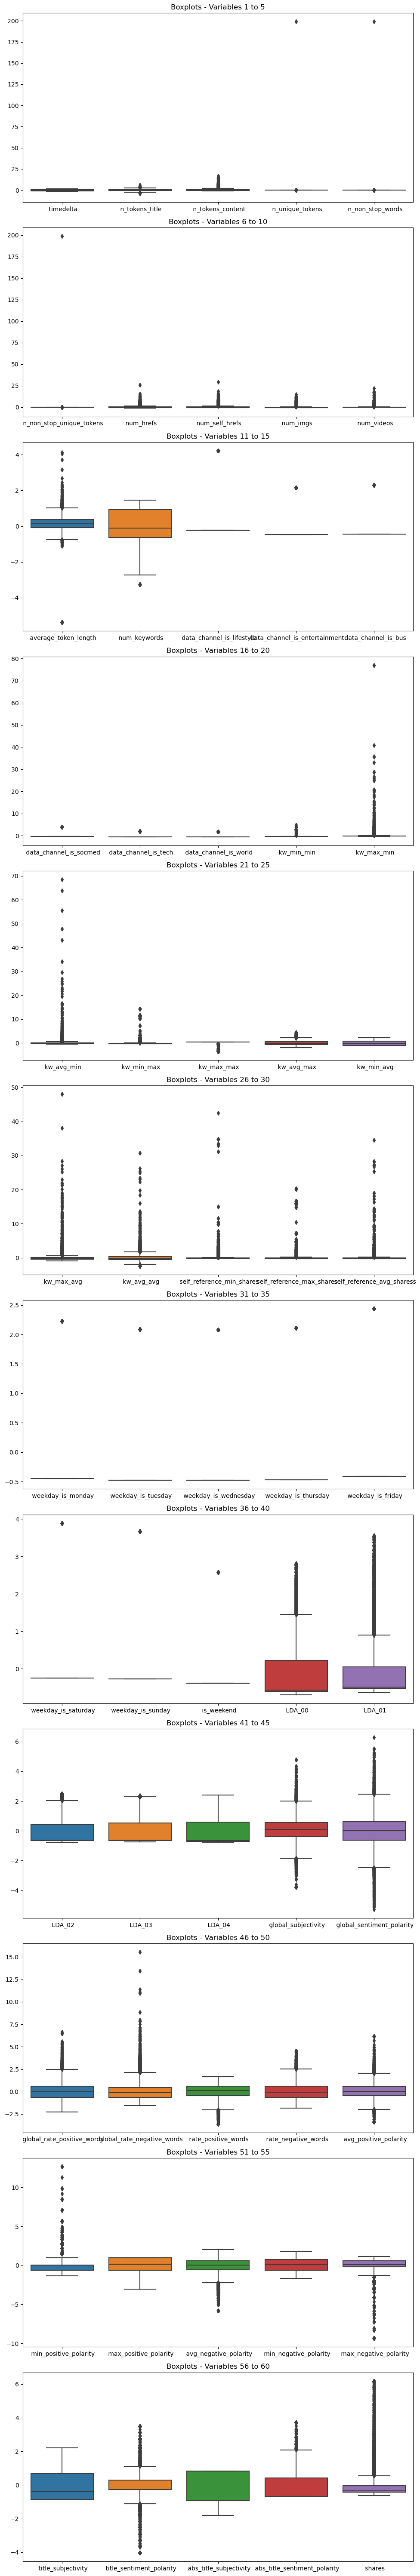

In [13]:
# Select numeric variables
numeric_variables = data.select_dtypes(include='number')

# Define the number of variables to display in each subplot
variables_per_subplot = 5

# Calculate the number of subplots needed
num_subplots = len(numeric_variables.columns) // variables_per_subplot
if len(numeric_variables.columns) % variables_per_subplot != 0:
    num_subplots += 1

# Create subplots
fig, axes = plt.subplots(nrows=num_subplots, ncols=1, figsize=(10, 5 * num_subplots))

# Plot boxplots for every 5 to 6 variables
for i, ax in enumerate(axes):
    start_idx = i * variables_per_subplot
    end_idx = (i + 1) * variables_per_subplot
    variables_to_plot = numeric_variables.columns[start_idx:end_idx]

    sns.boxplot(data=numeric_variables[variables_to_plot], ax=ax)
    ax.set_title(f'Boxplots - Variables {start_idx + 1} to {end_idx}')

# Adjust layout
plt.tight_layout()
plt.show()

#### Inference

* Different variables exhibited varying levels of spread, indicating diverse ranges of values and potential inconsistency.
* Outliers, seen as points beyond whiskers, suggested extreme cases or errors in the dataset.
* Extremes were visible, highlighting potential anomalies or measurement errors.
* Identifying variables with wider spreads aided in prioritizing control measures and investigation.
* Lack of context and scale visibility limited precise interpretation and specific recommendations.

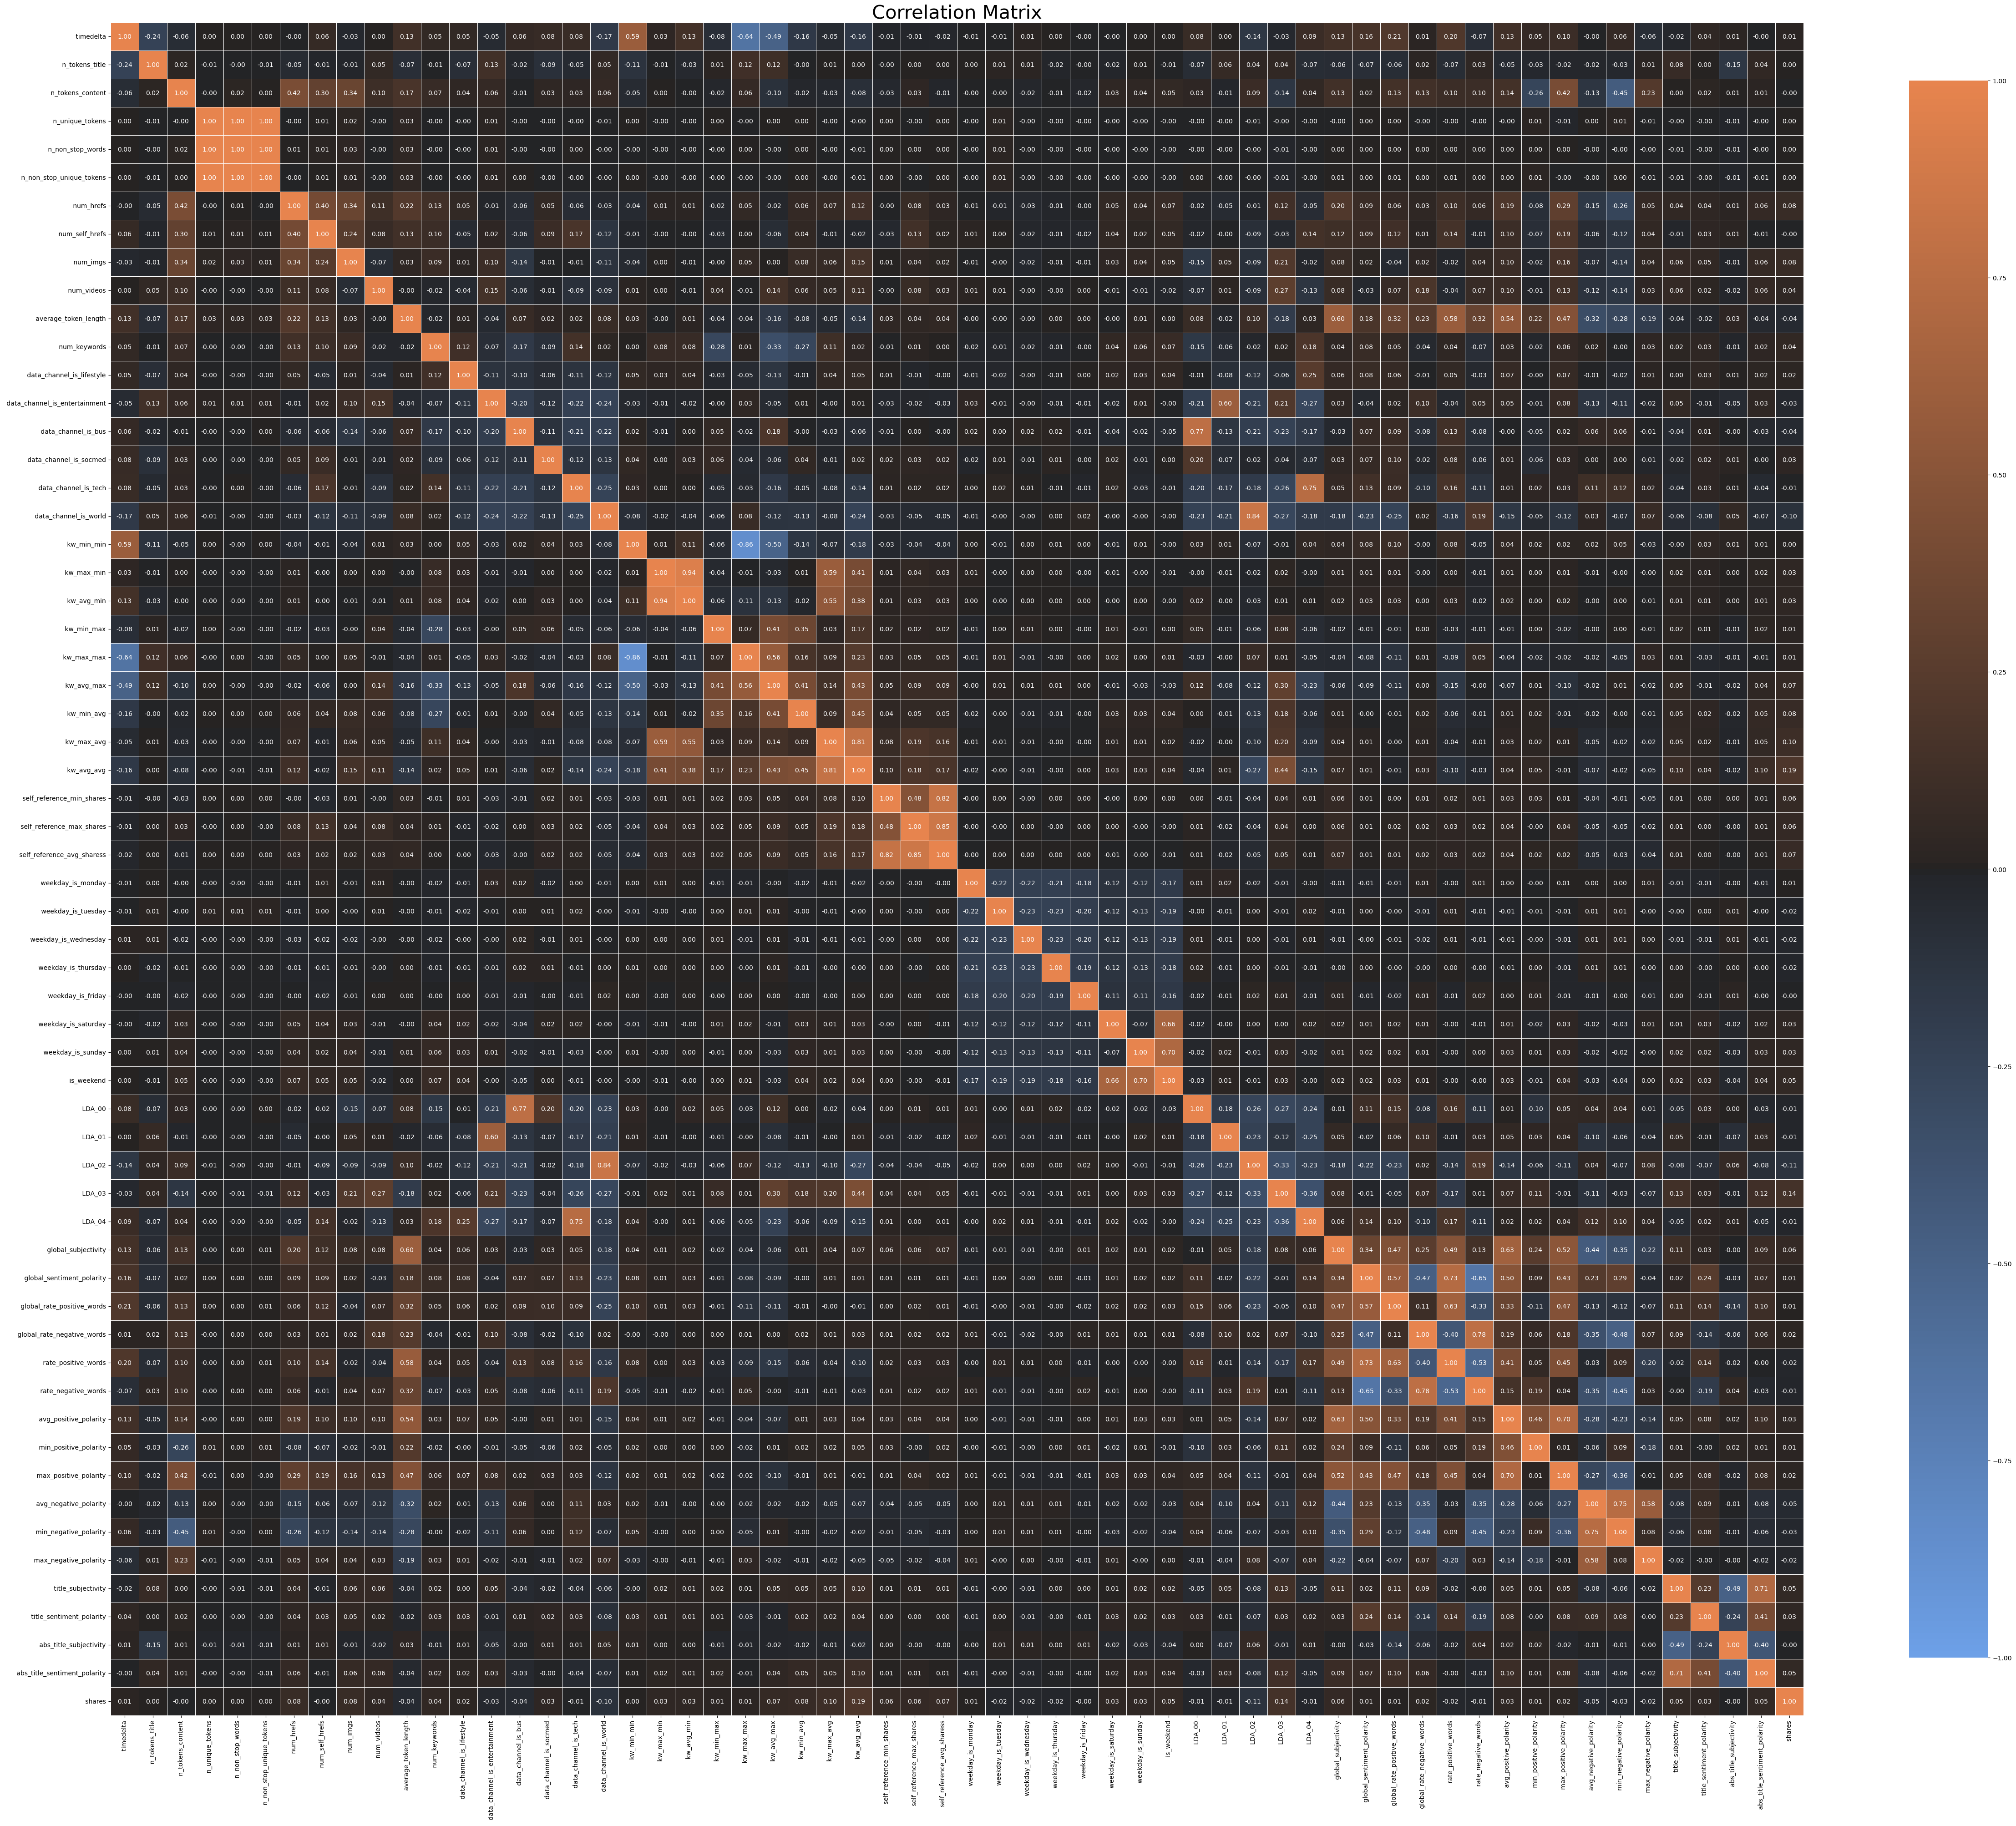

In [14]:
# Correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(60, 60))

# Choose a diverging color map with more colors
cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)

# Draw the heatmap
sns.heatmap(correlation_matrix, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot=True, fmt=".2f")

# View the heatmap
plt.title("Correlation Matrix", fontsize=30)
plt.show()

#### Inference

* Examining the heatmap revealed strong positive correlations along the diagonal, as expected. Distinct clusters of variables with higher correlations were observed, indicating potential relationships or shared influences between variables.

* The color intensity in the heatmap, ranging from warmer (orange) to darker colors, provided insights into the strength and direction of relationships. Highly correlated variables exhibited warmer colors, while darker shades represented lower or negative correlations.

* The analysis facilitated the identification of highly related variables, essential for feature selection in predictive modeling. Variables with strong correlations could potentially carry redundant information, guiding decisions on simplifying models without significant loss of information.

* The heatmap insights were valuable for decision-making, particularly in reducing dimensionality by addressing highly correlated variables. This strategic simplification aimed to enhance model interpretability and efficiency. The analysis also contributed to a deeper understanding of data structure for domain-specific interpretations and further investigation.

In [15]:
# Check the column names
print(data.columns)

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

#### Inference

* This allowed for a quick overview of all the columns present in the dataset, aiding in understanding the available features and facilitating subsequent analyses and manipulations.

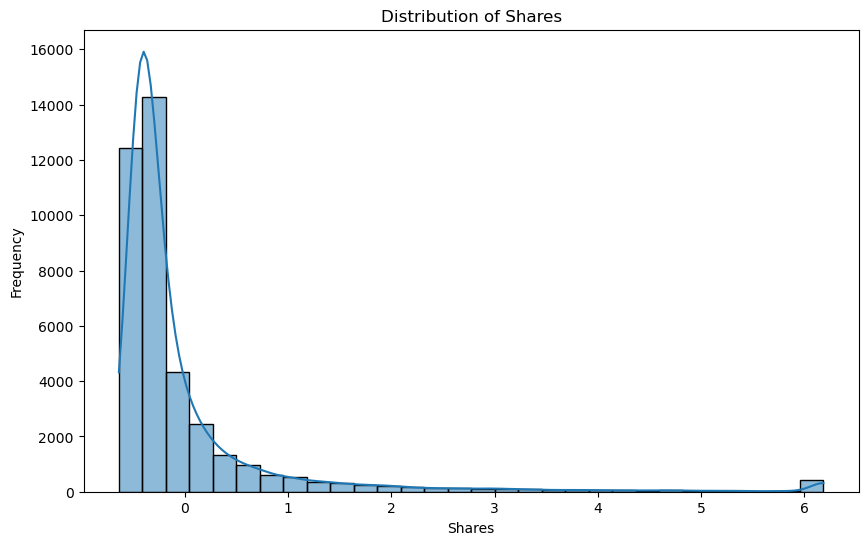

In [16]:
# Distribution of the response variable ('shares')
plt.figure(figsize=(10, 6))
sns.histplot(data[' shares'], bins=30, kde=True)
plt.title("Distribution of Shares")
plt.xlabel("Shares")
plt.ylabel("Frequency")
plt.show()

#### Inference

* The histogram analysis revealed a highly skewed distribution of shares, with a substantial concentration in the 0-10 shares range, indicating a common occurrence of a low number of shares.

* The mode of the distribution, representing the most common share count, was observed in the 0-10 shares range, with a frequency exceeding 160,000.

* A rapid drop-off in frequency was noted for higher share counts, suggesting that content with a substantial number of shares is less frequent and exhibits a sharp decline in occurrence.

* The distribution characteristics may imply potential barriers to widespread sharing or a natural tendency for most content to be shared infrequently, influencing strategies for content virality and shareability.

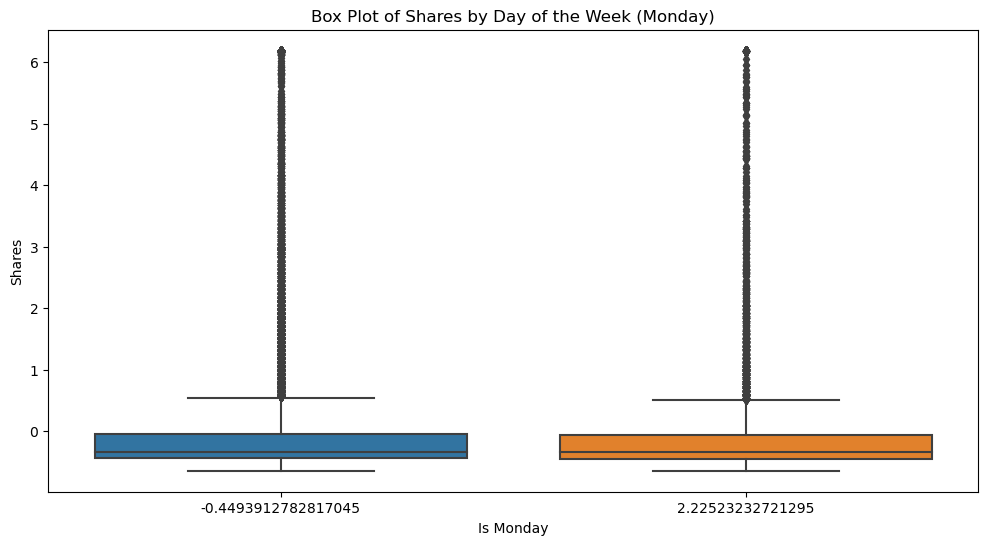

In [17]:
# Box plot of shares by category
plt.figure(figsize=(12, 6))
sns.boxplot(x=' weekday_is_monday', y=' shares', data=data)
plt.title("Box Plot of Shares by Day of the Week (Monday)")
plt.xlabel("Is Monday")
plt.ylabel("Shares")
plt.show()

#### Inference

* The box plot compared shares on Mondays and non-Mondays, revealing a lower and more variable median on Mondays, with notable outliers indicating sporadic high-share occurrences.

* Non-Mondays showed a slightly higher and more consistent median, implying a more stable distribution with fewer extreme values and a compact range of shares.

* Both distributions had outliers, with Mondays displaying more pronounced variability. The absence of explicit information on the lowest values suggests they are located at the lower end of the whiskers or near zero.

* In summary, Mondays have greater variability and potential for higher shares, while non-Mondays are more consistent but generally lower. This insight can guide content release strategies for marketers.

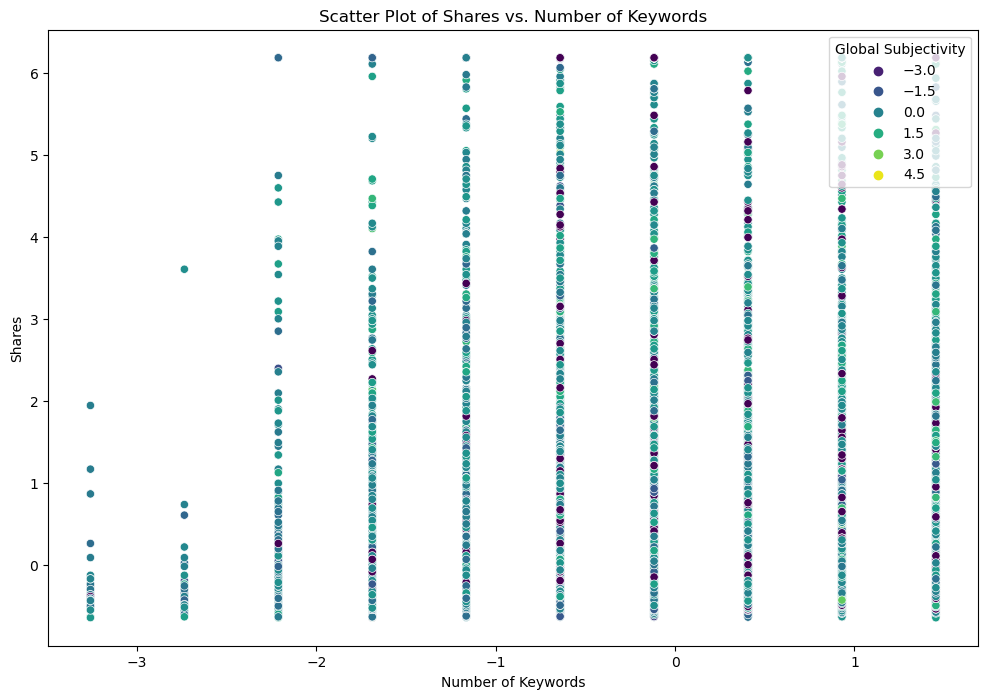

In [18]:
# Scatter plot of shares vs. number of keywords with color
plt.figure(figsize=(12, 8))
sns.scatterplot(x=' num_keywords', y=' shares', hue=' global_subjectivity', palette='viridis', data=data)
plt.title("Scatter Plot of Shares vs. Number of Keywords")
plt.xlabel("Number of Keywords")
plt.ylabel("Shares")
plt.legend(title='Global Subjectivity', loc='upper right')
plt.show()

#### Inference

* The scatter plot showed no clear correlation between the number of keywords and shares, with a concentration of data points at lower share counts.
* Increasing the number of keywords did not reveal a strong linear relationship with shares, suggesting a nuanced influence of keywords on sharing behavior.
* Global subjectivity, represented by point color, displayed no evident impact on share distribution, indicating a need for further analysis to understand its influence.
* Decision-making implications include the need for a more comprehensive strategy beyond increasing keywords, considering factors like content quality and engagement for effective share enhancement.

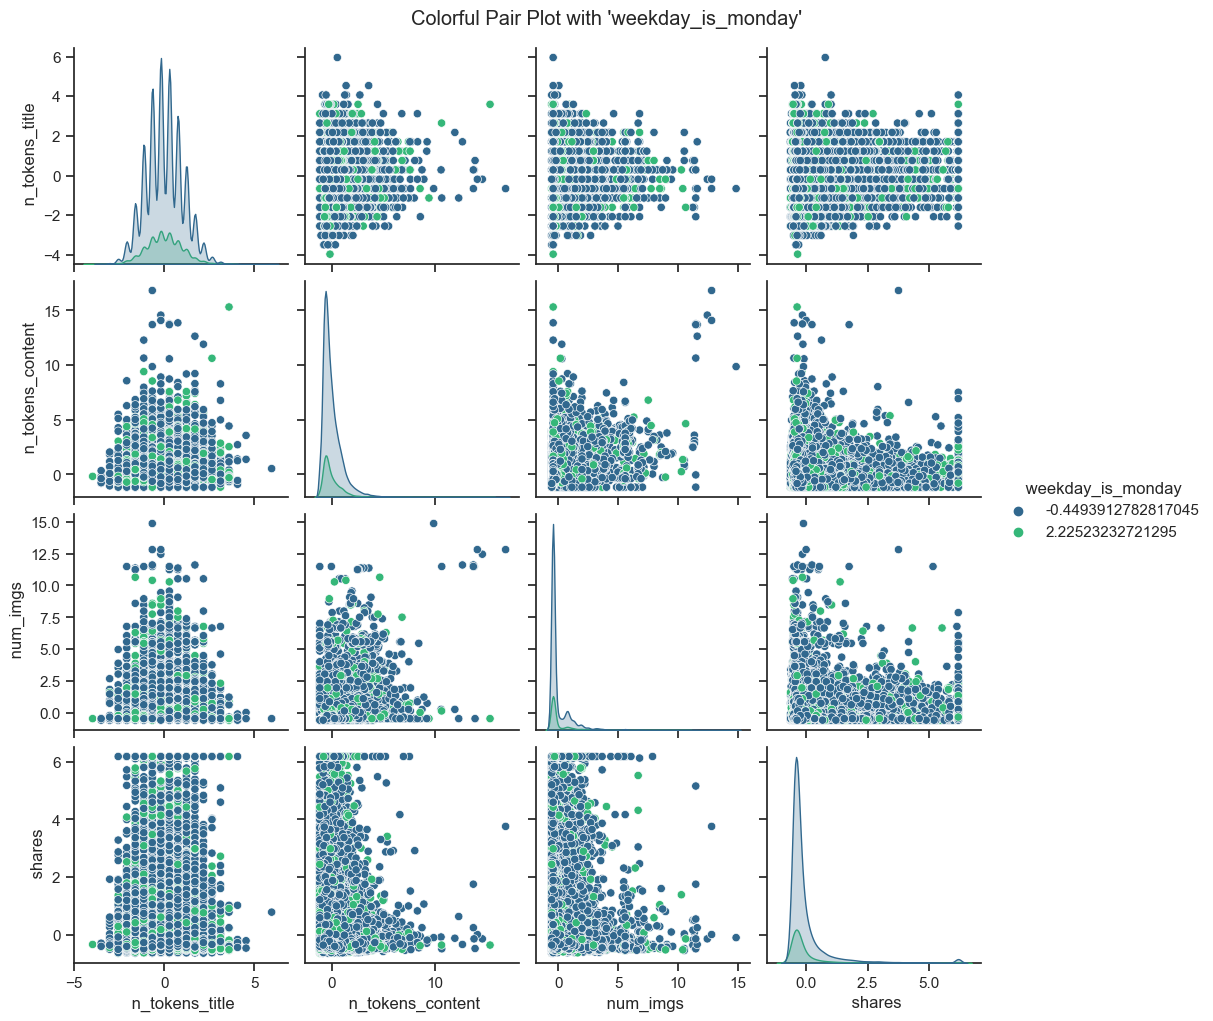

In [19]:
# Pair plot with color based on 'weekday_is_monday'
sns.set(style="ticks", color_codes=True)
selected_features = [' n_tokens_title', ' n_tokens_content', ' num_imgs', ' shares', ' weekday_is_monday']

# Convert 'weekday_is_monday' to categorical for better visualization
data[' weekday_is_monday'] = data[' weekday_is_monday'].astype('category')

sns.pairplot(data[selected_features], hue=' weekday_is_monday', palette='viridis', height=2.5)
plt.suptitle("Colorful Pair Plot with 'weekday_is_monday'", y=1.02)
plt.show()

#### Inference

* The pair plot revealed no strong linear relationships between variables, indicating potential influences not considered in the analysis.

* Distributions of 'n_tokens_content,' 'num_imgs,' and 'shares' showed right-skewed patterns, suggesting strategies should address the long tail for these variables.

* Unusual occurrences in 'shares' and 'num_imgs' were noticeable, emphasizing the importance of understanding factors driving extreme values.

* The analysis suggested that merely increasing content length or images might not guarantee higher shares, prompting the need for further investigation and segmentation for more specific insights.

## 4.  Feature Engineering

### Correlation Analysis

In [20]:
# Drop highly correlated features
corr_matrix = data.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
data_filtered = data.drop(columns=to_drop)

# Print the updated dataframe
print(data_filtered)

                                                     url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...    1.757880   
1      http://mashable.com/2013/01/07/ap-samsung-spon...    1.757880   
2      http://mashable.com/2013/01/07/apple-40-billio...    1.757880   
3      http://mashable.com/2013/01/07/astronaut-notre...    1.757880   
4       http://mashable.com/2013/01/07/att-u-verse-apps/    1.757880   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...   -1.618083   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...   -1.618083   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...   -1.618083   
39642     http://mashable.com/2014/12/27/ukraine-blasts/   -1.618083   
39643  http://mashable.com/2014/12/27/youtube-channel...   -1.618083   

        n_tokens_title   n_tokens_content   n_unique_tokens   num_hrefs  \
0             0.757447          -0.695210          0.032772 

#### Inference
* Highly correlated features were successfully identified and dropped from the dataset.
* The correlation matrix was computed, and a threshold of 0.8 was used to determine feature pairs with strong correlations.
* The resulting filtered dataset excluded redundant features, minimizing multicollinearity concerns in subsequent analyses.

#### Justification

The step was taken to address multicollinearity by removing highly correlated features, which can distort model interpretations. It enhances model stability and prevents redundant information, improving the effectiveness of subsequent analyses.

### Univariate Feature Selection

In [21]:
# Filter only numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_numeric = X[numeric_columns]

# Select top k features based on F-statistic
selector = SelectKBest(score_func=f_regression, k=10)
X_selected = selector.fit_transform(X_numeric, y)
selected_features = X_numeric.columns[selector.get_support()]

# Print selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index([' num_hrefs', ' num_imgs', ' data_channel_is_world', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_avg_sharess', ' LDA_02', ' LDA_03'],
      dtype='object')


#### Inference
* Numeric columns were isolated from the feature set to focus on quantitative variables.

* SelectKBest with F-statistic was employed to choose the top 10 features based on their relevance to predicting shares.

* The selected features, crucial for predicting shares, were identified and printed.

#### Justification
Numeric features were isolated for their direct interpretability, and SelectKBest was employed to highlight the most influential variables, ensuring a focused and efficient set for predicting shares.

## 5. Dimensionality Reduction Using Principal Component Analysis(PCA)

In [22]:
# Standardize the numeric data
X_standardized = StandardScaler().fit_transform(X_numeric)

#### Inference
* Numeric columns were isolated to maintain consistency in data type for subsequent processing.
* Standardization was applied to ensure variables were on a common scale, preventing biases in models sensitive to magnitude differences.
* This prepares the data for algorithms relying on standardized inputs, enhancing model performance and interpretability.

#### Justification
Numeric columns were isolated for consistency.
Standardization was performed to bring all variables to a common scale.
This preprocessing ensures algorithms are not influenced by varying magnitudes, promoting fair and accurate model training.

In [23]:
# Apply PCA
num_principal_components = 5
pca = PCA(n_components=num_principal_components)
X_pca = pca.fit_transform(X_standardized)

# Print the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Optionally, view the cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)

Explained Variance Ratio: [0.08275377 0.06985565 0.06110151 0.05087732 0.04765443]
Cumulative Explained Variance: [0.08275377 0.15260941 0.21371092 0.26458824 0.31224268]


#### Inference
* Applied PCA to reduce the data to 5 principal components.
* The explained variance ratio for these components is provided.
* Cumulative explained variance shows the proportion of total variance captured by the selected components.

#### Justification
Principal Component Analysis (PCA) was applied to reduce dimensionality. By printing the explained variance ratio, we gain insights into the proportion of variance captured by each principal component. Cumulative explained variance helps assess the overall information retained by the selected components. This aids in retaining significant information while reducing complexity.

In [24]:
# Convert non-numeric columns to numeric (drop non-convertible columns)
X_numeric = X.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='any')

# Apply PCA for dimensionality reduction on the numeric dataset
X_pca = pca.fit_transform(X_numeric)

# Print the transformed dataset
print("PCA Transformed Dataset:")
print(pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])]))

PCA Transformed Dataset:
            PC1       PC2       PC3       PC4       PC5
0     -1.357892 -1.883788 -1.977186  0.004116  0.445753
1      0.196177 -4.304504 -1.137372  0.091020 -0.339814
2     -3.731237 -3.497645 -1.737618 -0.072352 -0.372803
3     -0.670170 -1.694663 -3.438084 -0.099699  1.198639
4     -4.169629 -3.718021 -1.444065 -0.128140  0.389047
...         ...       ...       ...       ...       ...
39639  0.070787 -0.202756  0.785544  0.062645 -0.818254
39640 -1.429042  1.767672  2.378287  0.005481 -0.907082
39641  0.475438  2.643649  0.063829 -0.003429 -0.080479
39642  3.573921  0.244430 -3.163569  0.027783 -0.544389
39643  0.785722  0.611526  2.313792  0.243306 -2.264142

[39644 rows x 5 columns]


#### Inference
Non-numeric columns were converted to numeric using a coercive approach, dropping non-convertible columns. This transformation enables the application of PCA for dimensionality reduction on the numeric dataset. The resulting PCA-transformed dataset is more suitable for subsequent modeling, incorporating all available numeric features.

## 6. Model Training and Performance Evaluation

In [25]:
# Create a linear regression model
model = LinearRegression()

In [26]:
# Specify the number of folds for cross-validation
num_folds = 10

# Perform cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_pca, y, scoring='neg_mean_squared_error', cv=kf)

#### Inference
The number of folds for cross-validation (10) was specified to assess the model's performance across multiple subsets of the data. KFold with shuffling ensures diverse training and test sets, providing a robust evaluation of the model's predictive capability on unseen data. Cross-validation scores, specifically using negative mean squared error as the scoring metric, help quantify the model's predictive accuracy and generalization performance.

In [27]:
# Calculate the mean and standard deviation of cross-validation scores
mean_cv_score = -np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the cross-validation performance metrics
print(f"Mean Cross-Validation MSE: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation MSE: {std_cv_score}")

Mean Cross-Validation MSE: 2.188726455116906
Standard Deviation of Cross-Validation MSE: 3.6642109705716104


#### Inference
* **Mean Cross-Validation MSE:** The average mean squared error across multiple cross-validation folds is approximately 2.19, indicating the overall predictive performance of the model.

* **Standard Deviation of Cross-Validation MSE:** The standard deviation of approximately 3.68 suggests variability in model performance across different folds, highlighting potential instability or sensitivity to the training data.

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Inference
Splitting the data into training and testing allows for model training and evaluation, ensuring a reliable assessment of the linear regression model's performance.

In [29]:
# Make predictions on the test set
y_pred = model.predict(X_test)

#### Inference
Making predictions on the test set allows us to assess the linear regression model's performance and evaluate its ability to generalize to new, unseen data.

In [30]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.9420984707374477
R-squared (R2) Score: 0.0365379920244544


#### Inference
* **Mean Squared Error (MSE):** The average squared difference between predicted and actual values is approximately 0.94, indicating a moderate level of prediction error in the model.

* **R-squared (R2) Score:** The R2 score of approximately 0.04 suggests that only about 4% of the variability in the target variable is explained by the model, indicating a weak predictive performance.

# Conclusion

* **Feature Selection Impact:** Feature selection and dimensionality reduction techniques, such as PCA, were applied to improve model efficiency and reduce multicollinearity in the dataset.

* **Model Performance:** The linear regression model exhibited limited predictive power, evident from a relatively high mean squared error (MSE) and a low R-squared (R2) score.

* **Cross-Validation Insights:** Cross-validation provided a more robust evaluation, revealing the model's variance and its generalization to new data, as reflected in the mean cross-validation MSE and its standard deviation.

* **Variable Correlation:** Correlation analysis and feature selection aimed to address multicollinearity, which can impact model interpretability. Dropping highly correlated features helped streamline the dataset.

* **Content Sharing Patterns:** Exploratory data analysis highlighted skewed distributions in content sharing, suggesting that most articles receive a low number of shares, with fewer instances of highly shared content. Strategies for increasing shares may require a nuanced approach beyond simply increasing content length or the number of keywords.

# Overall Observation
The analysis involved comprehensive data preprocessing, exploratory analysis, and model evaluation. Feature selection, dimensionality reduction, and cross-validation were crucial for model robustness. Despite these efforts, the linear regression model demonstrated limitations, indicating a need for more advanced modeling techniques or additional relevant features for improved predictions.